In [1]:
import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.ticker import MultipleLocator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'
sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})

In [2]:
df = pd.DataFrame()

# outlier 2 rare variant

app = pd.read_csv('avg_dist.tsv', sep='\t')
app = app.set_index('subject', drop=False).copy()

app = app.melt(id_vars='subject', value_vars='avg_shortest_distance')
app['label'] = 'outliers to rare variants'
app['label2'] = 'o2v'
app['order'] = 0
app['group'] = 'bsn'
app['group2'] = 'o2v'
app = app[~(app.value.isna())]

df = df.append(app)

# outlier 2 rare variant random

app = pd.read_csv('avg_dist_perm.tsv', sep='\t')
app = app.set_index('subject', drop=False).copy()

app = app.melt(id_vars='subject', value_vars='avg_shortest_distance')
app['label'] = 'outliers to rare variants (permuted)'
app['label2'] = 'o2v_r'
app['order'] = 1
app['group'] = 'permute'
app['group2'] = 'o2v'
app = app[~(app.value.isna())]

df = df.append(app)

# de 2 rare variant

app = pd.read_csv('avg_dist_famde.tsv', sep='\t')
app = app.set_index('subject', drop=False).copy()

app = app.melt(id_vars='subject', value_vars='avg_shortest_distance')
app['label'] = 'fam de to rare variants'
app['label2'] = 'd2v'
app['order'] = 2
app['group'] = 'bsn'
app['group2'] = 'd2v'
app = app[~(app.value.isna())]

df = df.append(app)

# de 2 rare variant random

app = pd.read_csv('avg_dist_famde_perm.tsv', sep='\t')
app = app.set_index('subject', drop=False).copy()

app = app.melt(id_vars='subject', value_vars='avg_shortest_distance')
app['label'] = 'fam de to rare variants (permute)'
app['label2'] = 'd2v_r'
app['order'] = 3
app['group'] = 'permute'
app['group2'] = 'd2v'
app = app[~(app.value.isna())]

df = df.append(app)

In [3]:
# MW tests

vala = 'o2v'
valb = 'o2v_r'
a = df[df.label2 == vala].value.to_list()
b = df[df.label2 == valb].value.to_list()

print(len(a), len(b))
print(vala)
print(valb)
print((mannwhitneyu(a,b, alternative='less')))

vala = 'd2v'
valb = 'd2v_r'
a = df[df.label2 == vala].value.to_list()
b = df[df.label2 == valb].value.to_list()

print(len(a), len(b))
print(vala)
print(valb)
print((mannwhitneyu(a,b, alternative='less')))

32 32
o2v
o2v_r
MannwhitneyuResult(statistic=207.0, pvalue=2.1702182238551903e-05)
17 17
d2v
d2v_r
MannwhitneyuResult(statistic=0.0, pvalue=3.5270438117005704e-07)


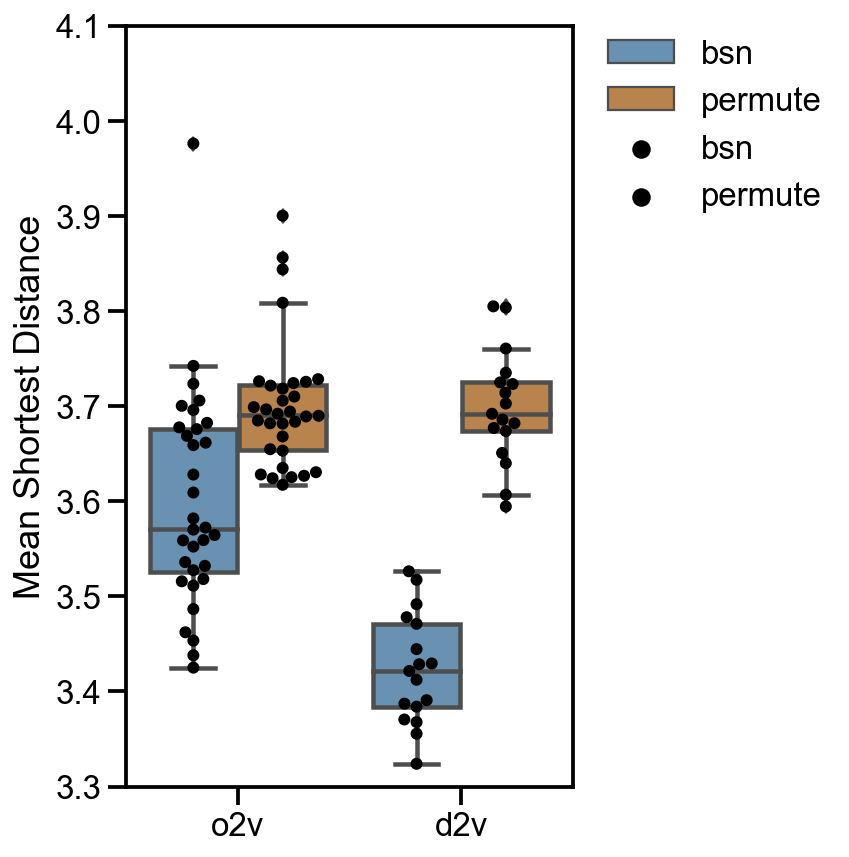

In [5]:
plt.figure(figsize=(4,7))
sns.set_context('talk')

colors = ['#5C92BE', '#CA833A']
colors2 = ['black', 'black']
g = sns.boxplot(data=df, x='group2', y='value', hue='group', palette=colors)
# g = sns.stripplot(data=df, x='group2', y='value', hue='group', dodge=True,
#                  edgecolor='black', linewidth=1)
g = sns.swarmplot(data=df, x='group2', y='value', hue='group', dodge=True,
                  edgecolor='black', linewidth=1, palette=colors2)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

g.set_ylim([3.3, 4.1])
# g.get_yaxis().set_major_locator(MultipleLocator(1))
# g.get_yaxis().set_minor_locator(MultipleLocator(.25))


g.set_ylabel('Mean Shortest Distance')
g.set_xlabel(None)

plt.savefig('bar_plotnetwork_permute.pdf', dpi=300)

# children vs. carrier parents

In [9]:
affected_child = ['SG001', 'SG011', 'SG021', 'SG026', 'SG155', 'SG041', 'SG042', 'SG037', 'SG148', 'SG022']
carrier_parents = ['SG006', 'SG025', 'SG069', 'SG040', 'SG044', 'SG151']


In [10]:
cvp = df.copy()

def get_rel(s):
    if s in affected_child:
        return 'carrier child'
    if s in carrier_parents:
        return 'carrier parent'
    return ''

cvp['group3'] = cvp.subject.apply(get_rel)
cvp = cvp[cvp.group3 != ''].copy()
cvp = cvp[cvp['group'] == 'bsn'].copy()

In [11]:
cvp['group_all'] = cvp['group'] + cvp['group2'] + cvp['group3']

In [18]:
group_a = 'bsno2vcarrier child'
group_b = 'bsno2vcarrier parent'

a = cvp[cvp['group_all'] == group_a].value.to_list()
b = cvp[cvp['group_all'] == group_b].value.to_list()

print((mannwhitneyu(a,b, alternative='less')))

group_a = 'bsnd2vcarrier child'
group_b = 'bsnd2vcarrier parent'

a = cvp[cvp['group_all'] == group_a].value.to_list()
b = cvp[cvp['group_all'] == group_b].value.to_list()

print((mannwhitneyu(a,b, alternative='less')))

MannwhitneyuResult(statistic=24.0, pvalue=0.2754010062914416)
MannwhitneyuResult(statistic=9.0, pvalue=0.09483119988207284)


In [21]:
ttest_ind(a,b)

Ttest_indResult(statistic=-1.567281989405536, pvalue=0.14534617146658435)

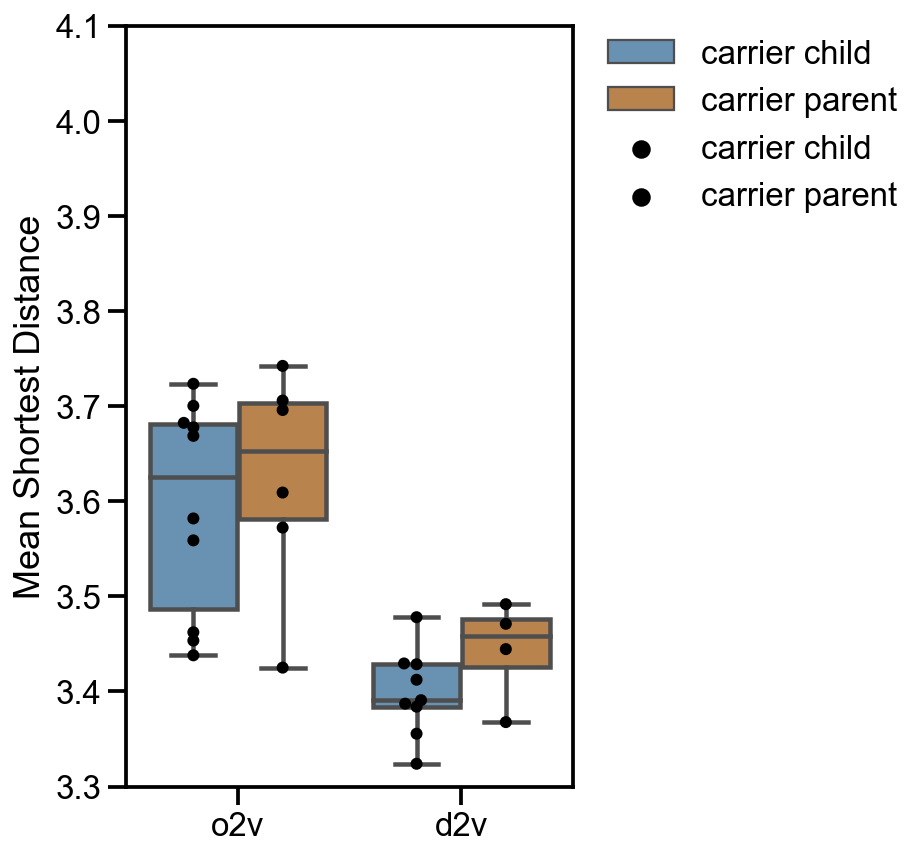

In [19]:
plt.figure(figsize=(4,7))
sns.set_context('talk')

colors = ['#5C92BE', '#CA833A']
colors2 = ['black', 'black']
g = sns.boxplot(data=cvp, x='group2', y='value', hue='group3', palette=colors)
g = sns.swarmplot(data=cvp, x='group2', y='value', hue='group3', dodge=True,
                  edgecolor='black', linewidth=1, palette=colors2)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

g.set_ylim([3.3, 4.1])
# g.get_yaxis().set_major_locator(MultipleLocator(1))
# g.get_yaxis().set_minor_locator(MultipleLocator(.25))


g.set_ylabel('Mean Shortest Distance')
g.set_xlabel(None)

plt.savefig('bar_plotnetwork_child_v_parent.pdf', dpi=300)

# global DE

In [29]:
df = pd.DataFrame()

app = pd.read_csv('gde2gde.tsv', sep='\t')
a = app['avg_shortest_distance'].to_list()
app['groupp'] = 'BSNA'
df = df.append(app)


app = pd.read_csv('gde2gde_perm.tsv', sep='\t')
b = app['avg_shortest_distance'].to_list()
app['groupp'] = 'Perm'
df = df.append(app)



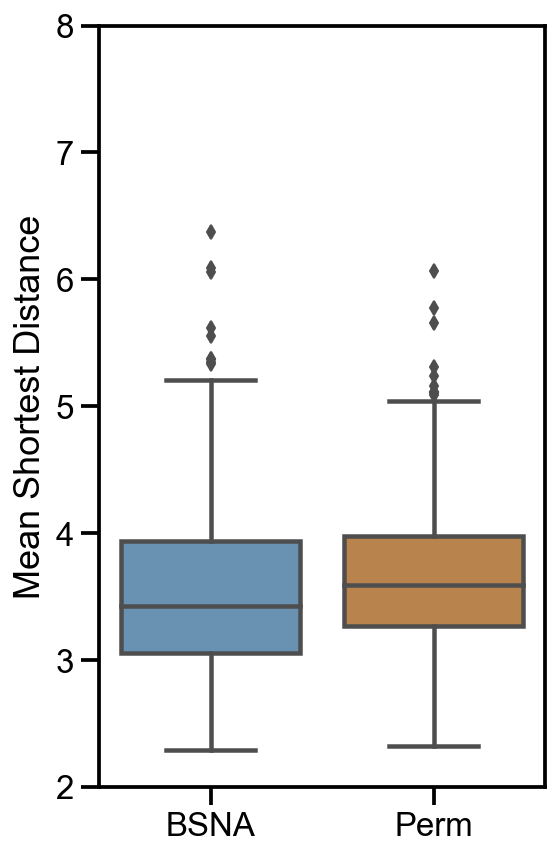

In [38]:
plt.figure(figsize=(4,7))
sns.set_context('talk')

colors = ['#5C92BE', '#CA833A']
g = sns.boxplot(data = df, x='groupp', y = 'avg_shortest_distance', palette=colors)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

g.set_ylim([2.0, 8])

g.set_ylabel('Mean Shortest Distance')
g.set_xlabel(None)

plt.savefig('bar_plot_global_de.pdf', dpi=300)